In [1]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-150:t_flash[i,0]+250-150,:] += (erptemplate1*100)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
    return signal

def ds2(s2, t_flash):
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            #signal2[t_flash[i,0]-150:t_flash[i,0]+250-150,:] += (erptemplate1*100)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            s2[t_flash[i,0]-150:t_flash[i,0]+250-150,:]
    return s2
#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')       # Now load the basal EEG stream

t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

signal = p300subject25['data'][0][0][0]    
signal = DrugSignal(signal, t_flash)
df_signal = a_fun.to_df(signal)

s2 = p300subject25['data'][0][0][0]    
s2 = ds2(s2, t_flash)
df_s2 = a_fun.to_df(s2)

A continuación, grafico las dos señales a trabajar: signal y flash.  

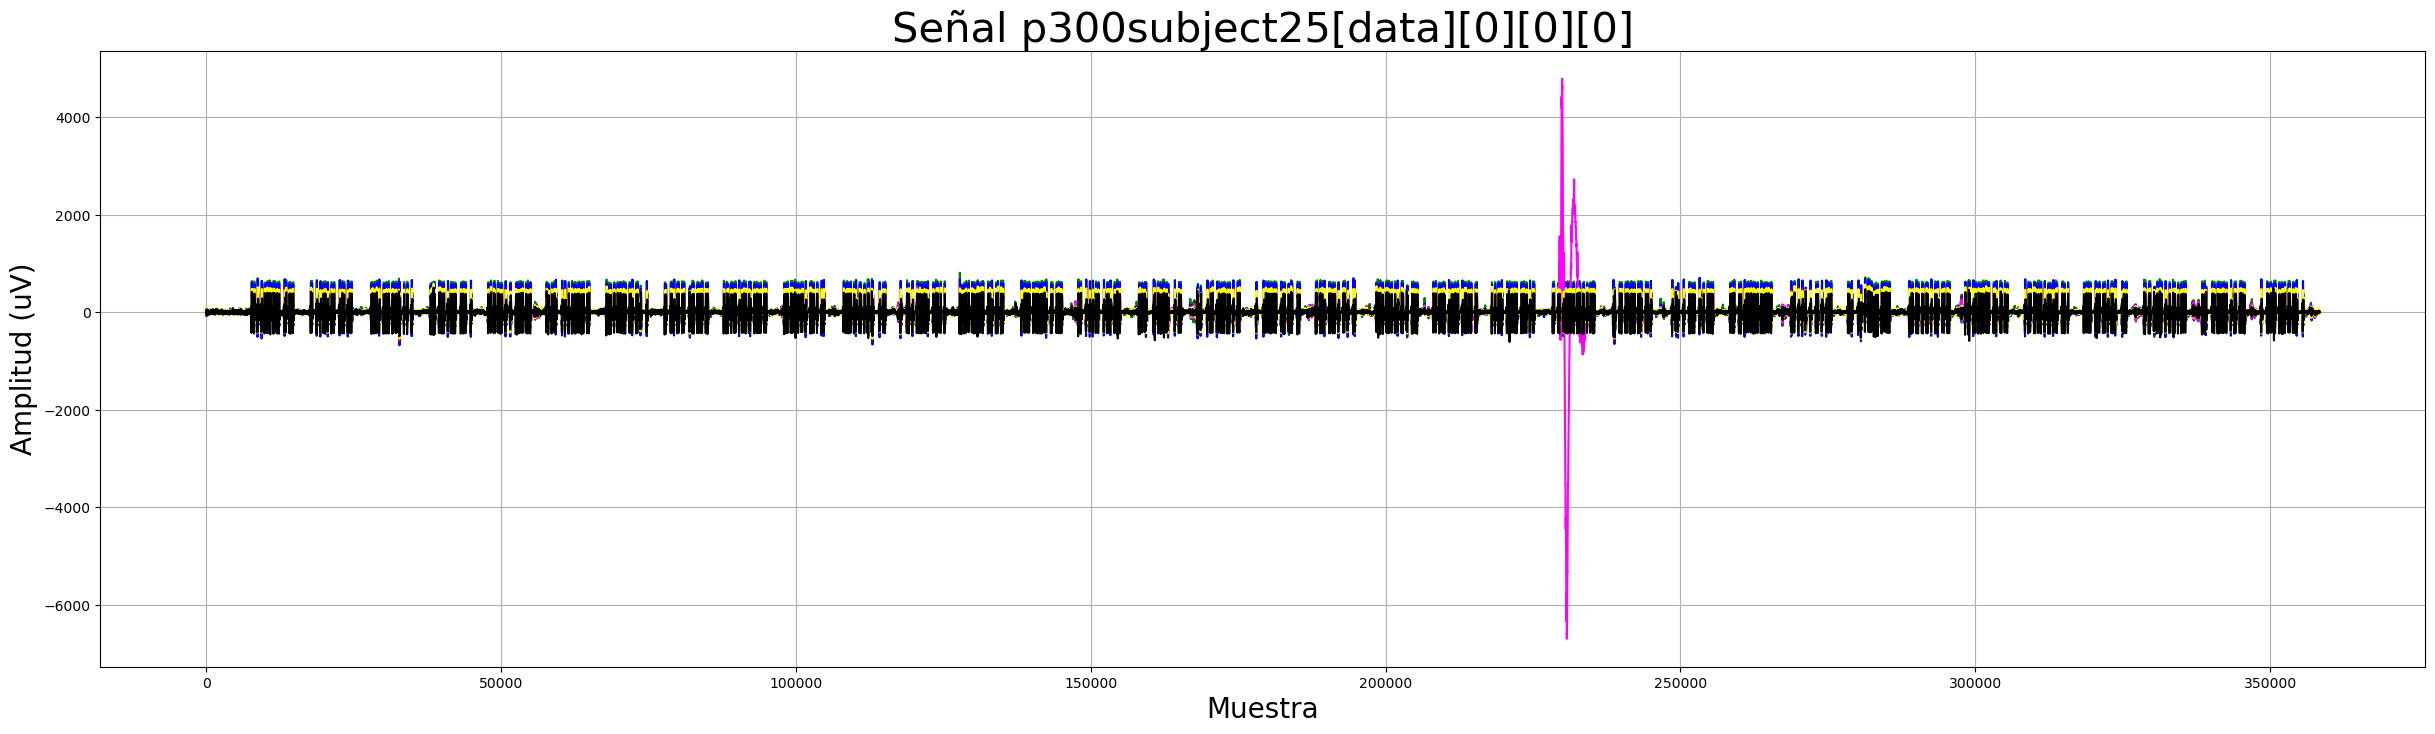

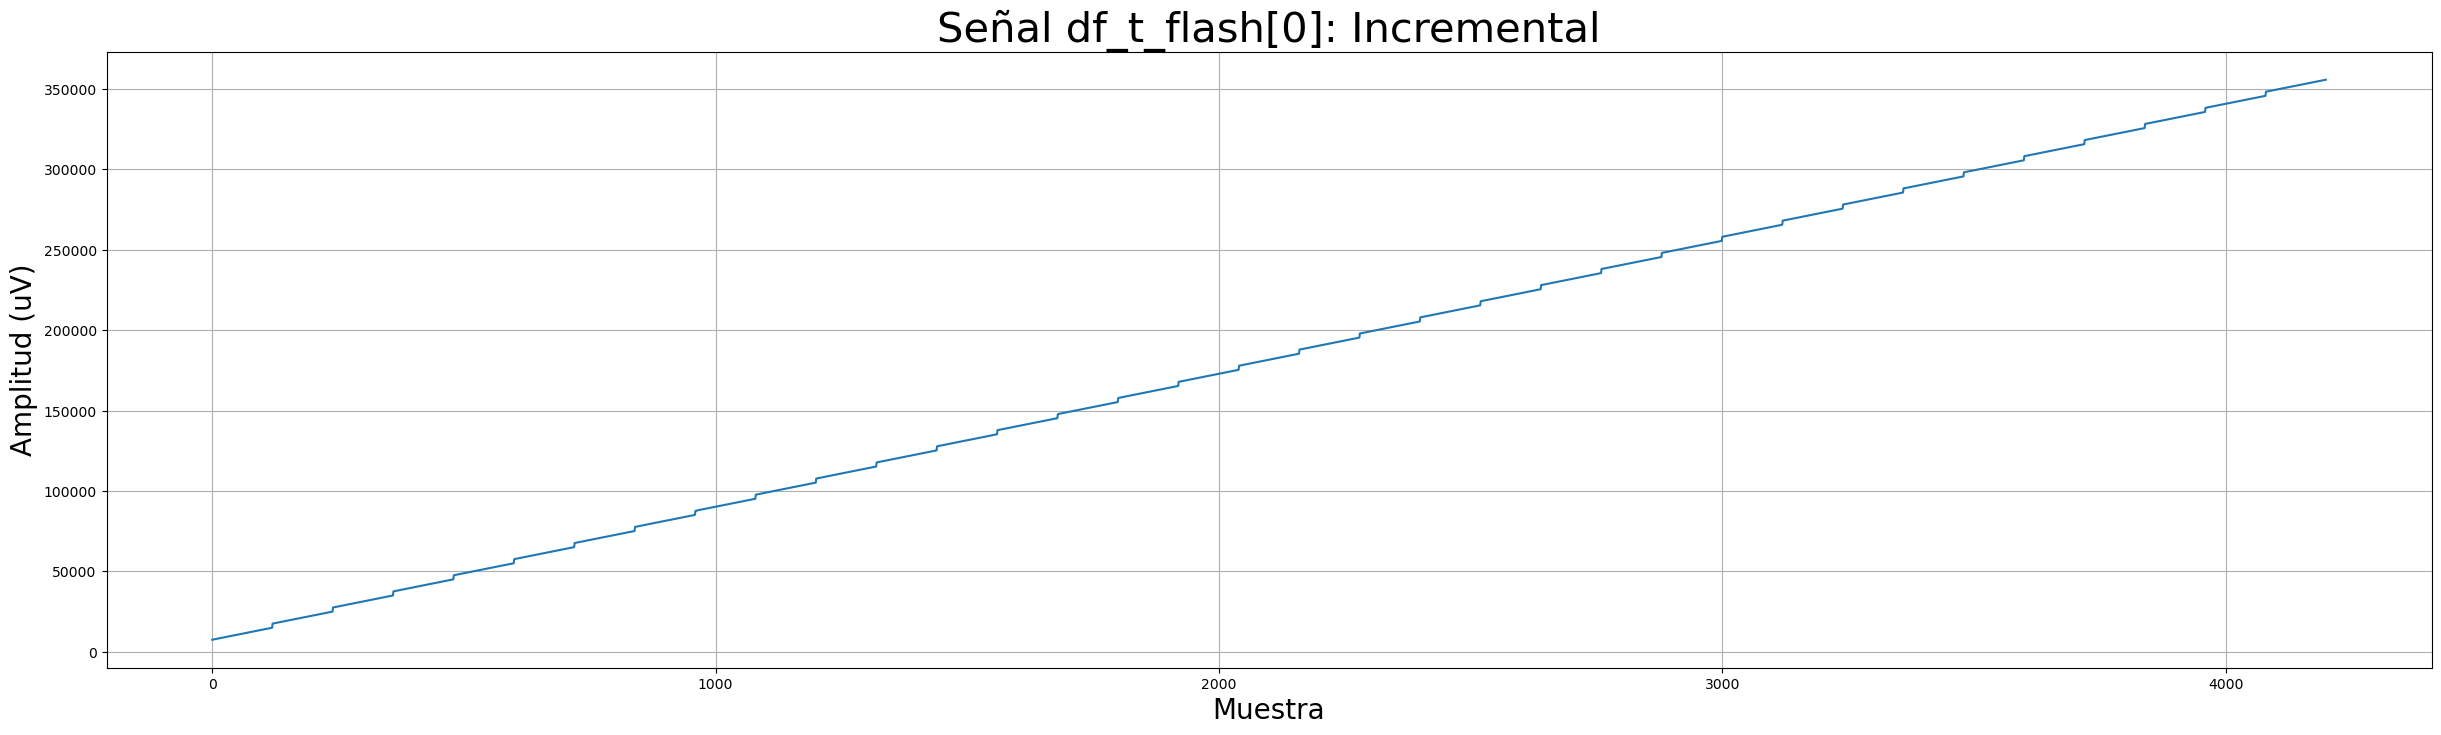

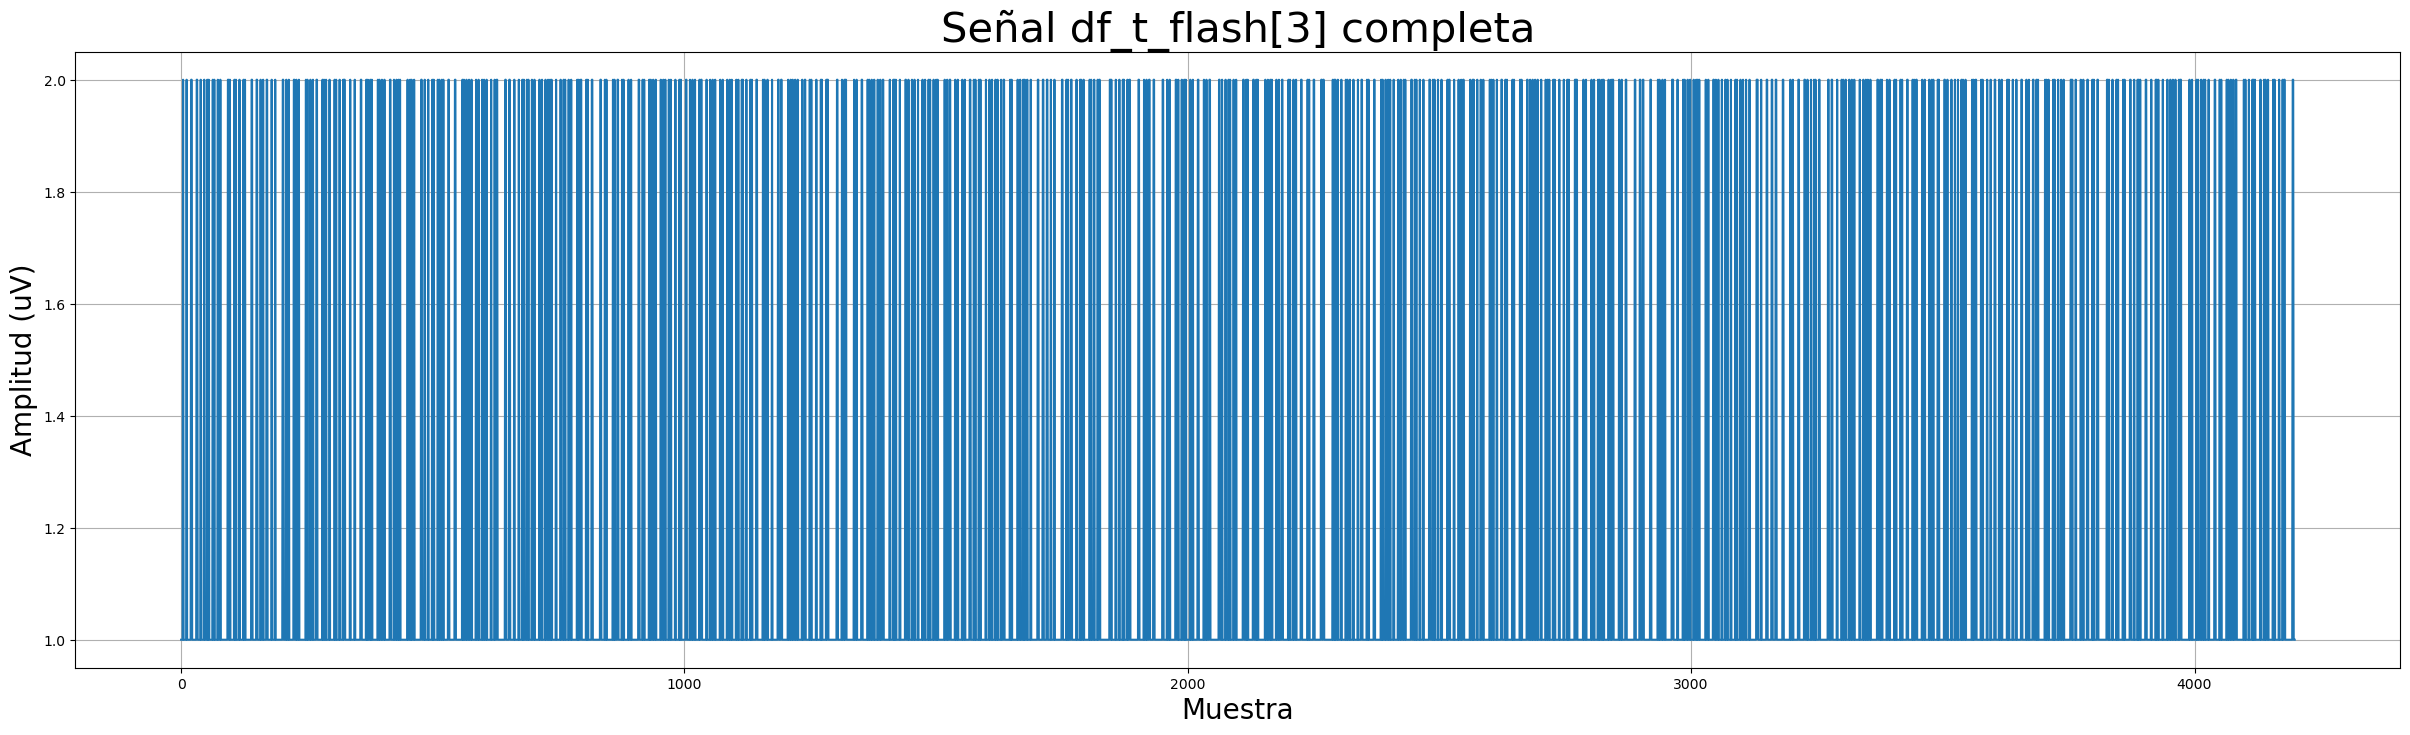

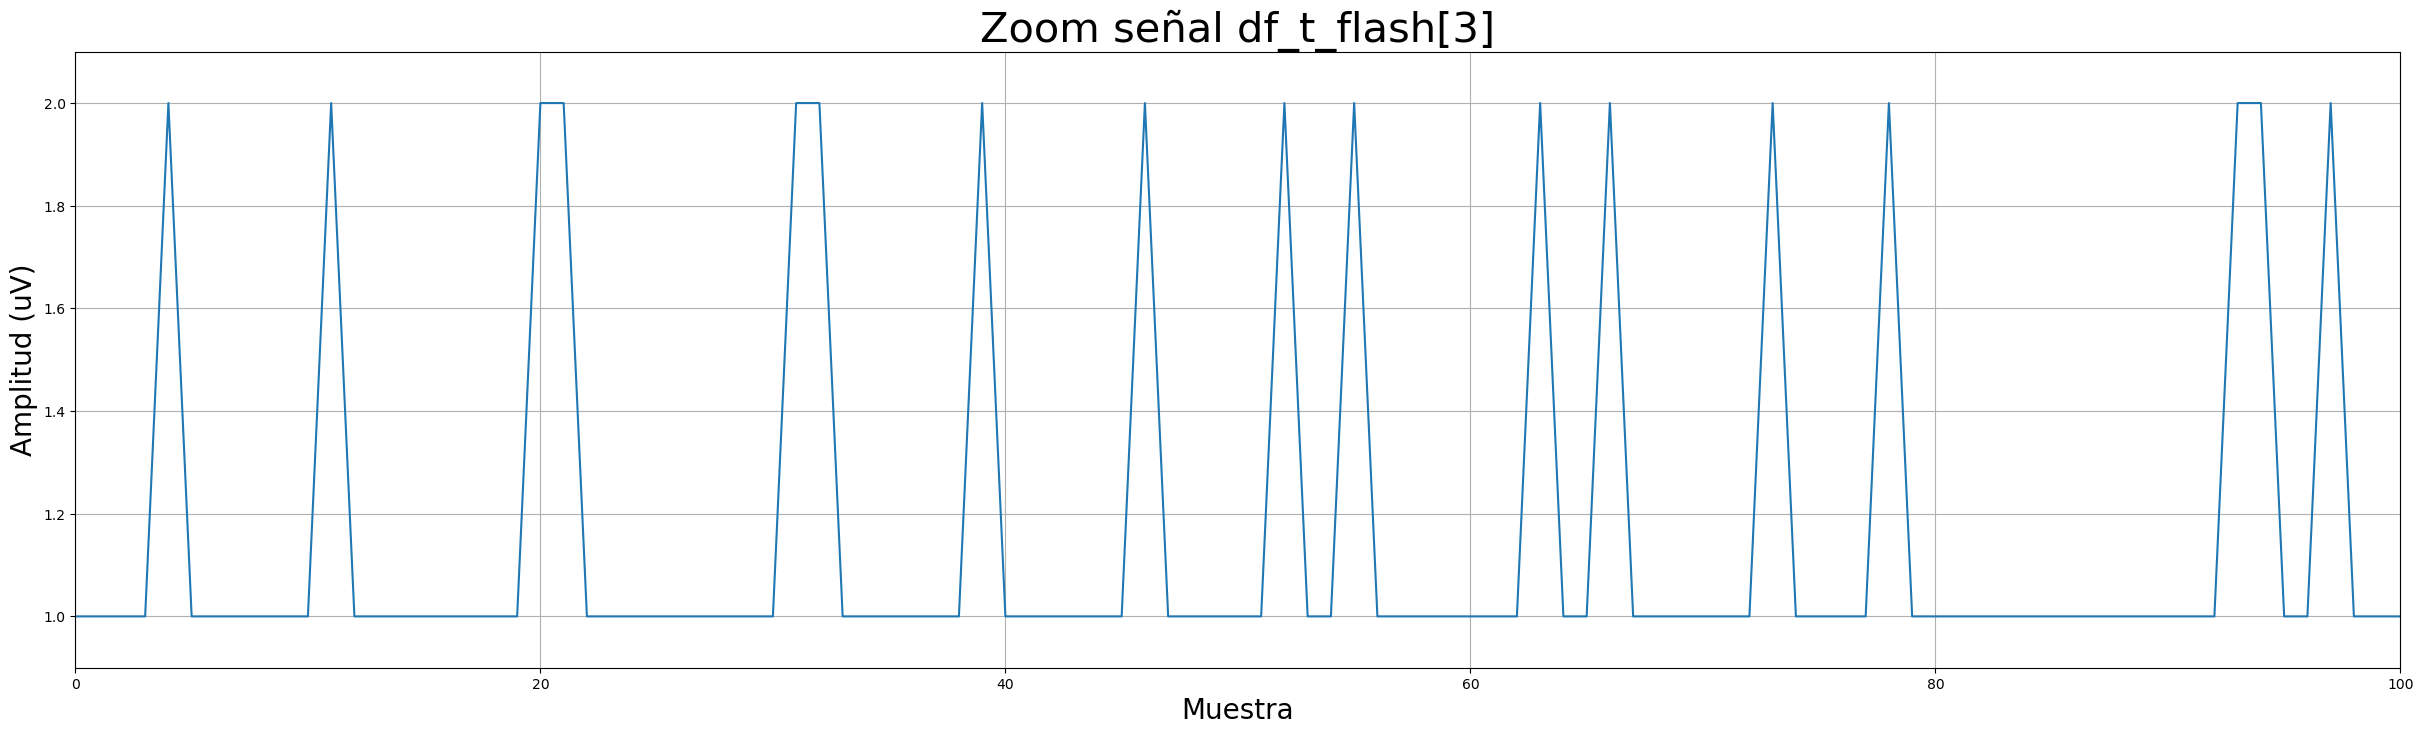

(None, None)

In [2]:
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Señal p300subject25[data][0][0][0]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
#plt.savefig("./a_images/01DrguSignal_Ampx50.jpg")
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[0])
axes.set_title('Señal df_t_flash[0]: Incremental'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
#plt.savefig("./a_images/01DrguSignal_Ampx50.jpg")
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Señal df_t_flash[3] completa') axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
#plt.savefig("./a_images/01DrguSignal_Ampx50.jpg")
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Zoom señal df_t_flash[3]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
#plt.savefig("./a_images/01DrguSignal_Ampx50.jpg")
plt.xlim([0,100]), plt.ylim([0.9,2.1])
plt.grid(), plt.show()

En la siguientes gráficas modifico el erptemplate1 multiplicándolo por 50 dentro de la función DrugSignal.  
El objetivo es visualizar en dónde afecta la señal.    

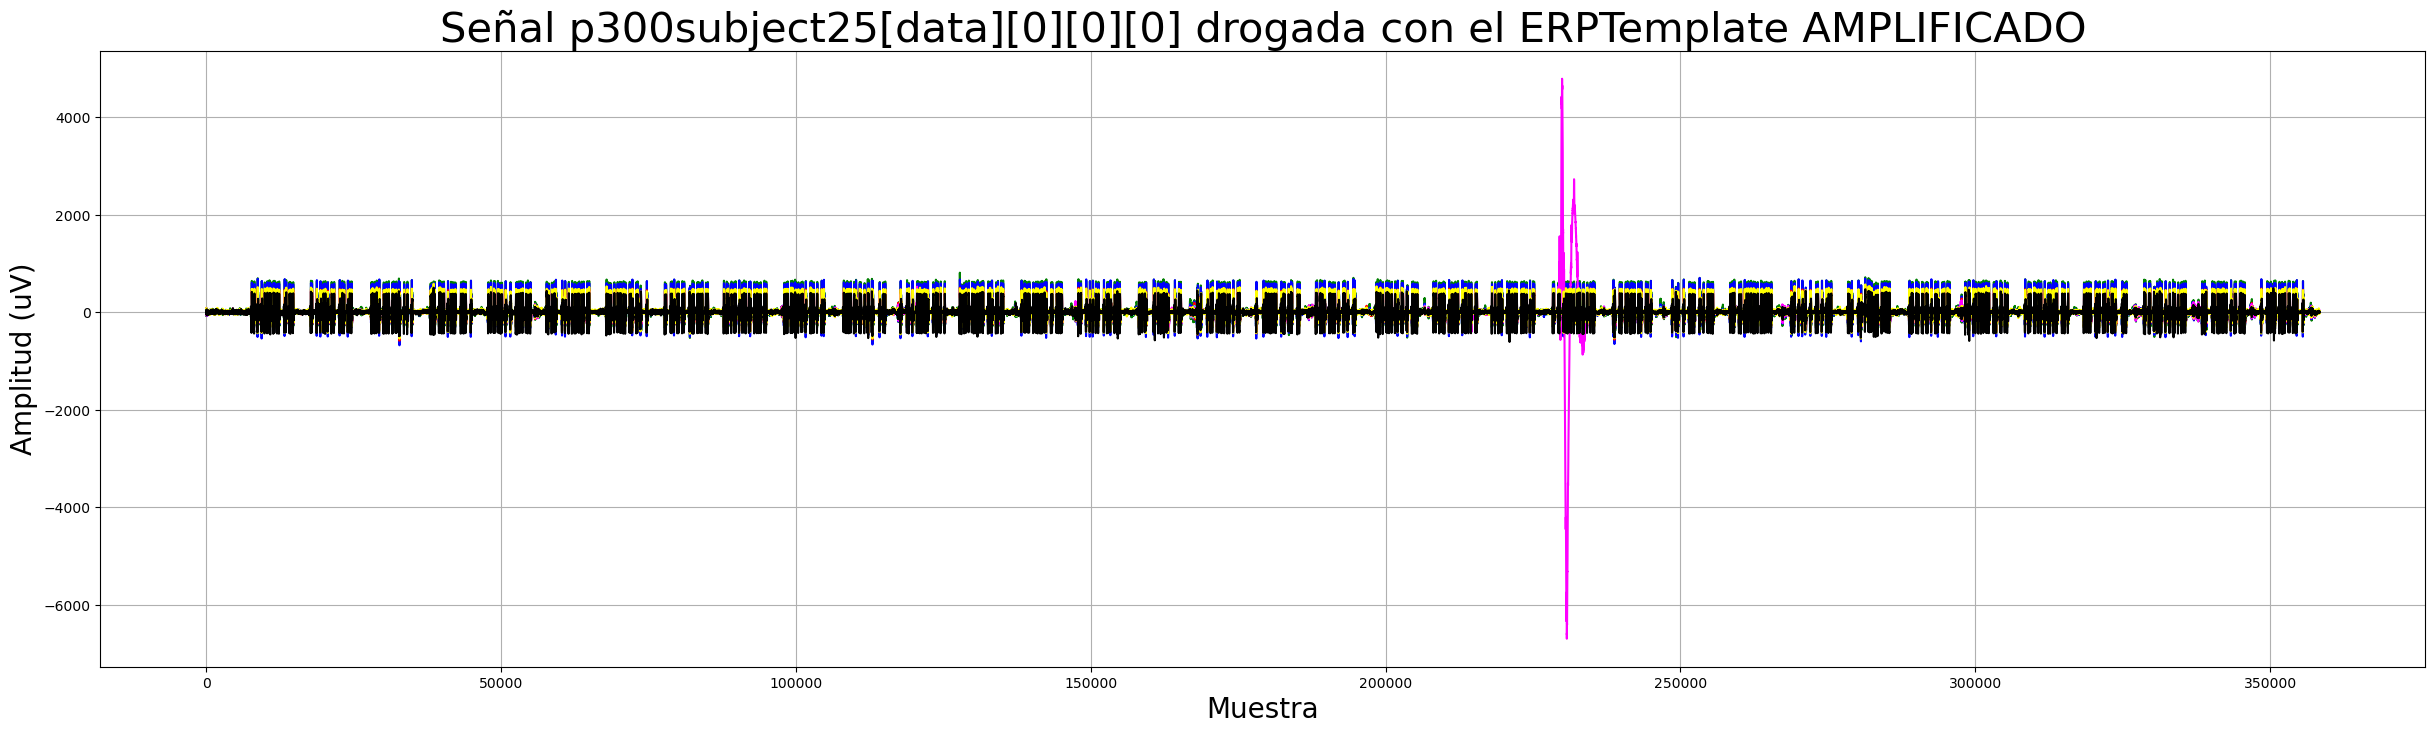

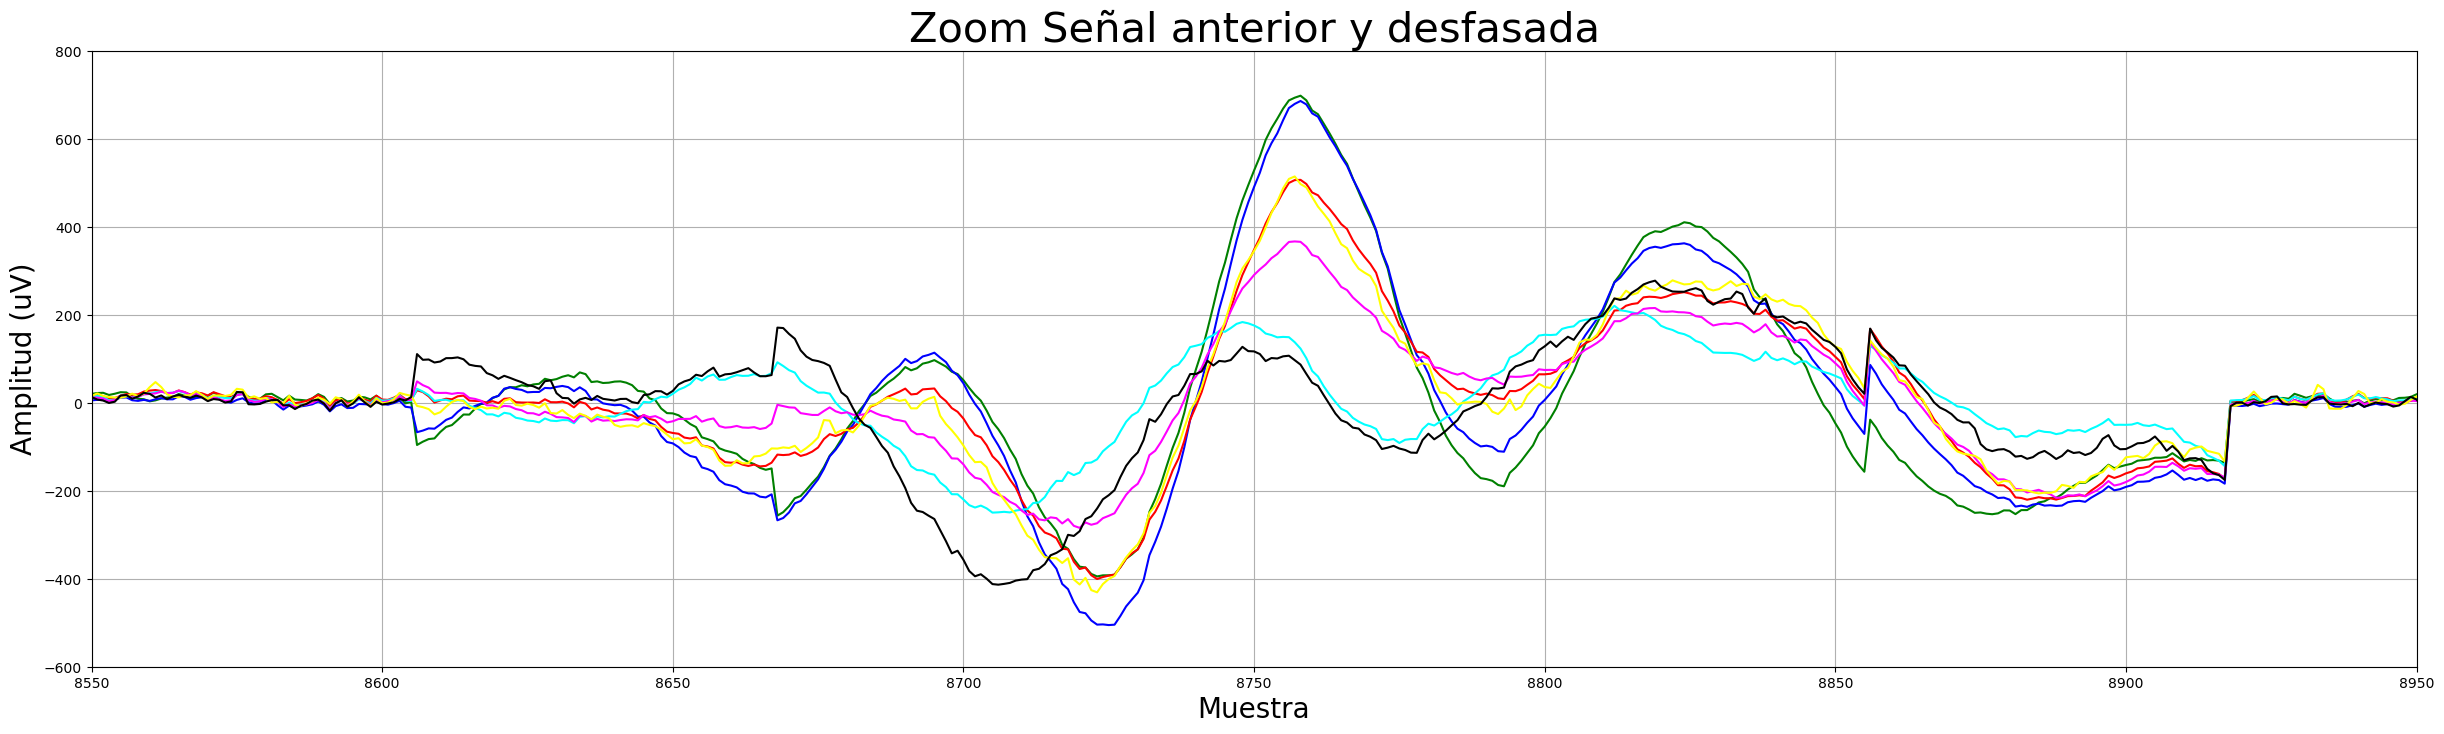

(None, None)

In [3]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])                                                           
axes.set_title('Señal p300subject25[data][0][0][0] drogada con el ERPTemplate AMPLIFICADO'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/01DrguSignal_Ampx100.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([8550,8950]), plt.ylim([-600,800])
plt.savefig("./a_images/02Zoom_DrguSignal_Ampx100.jpg")
plt.grid(), plt.show()

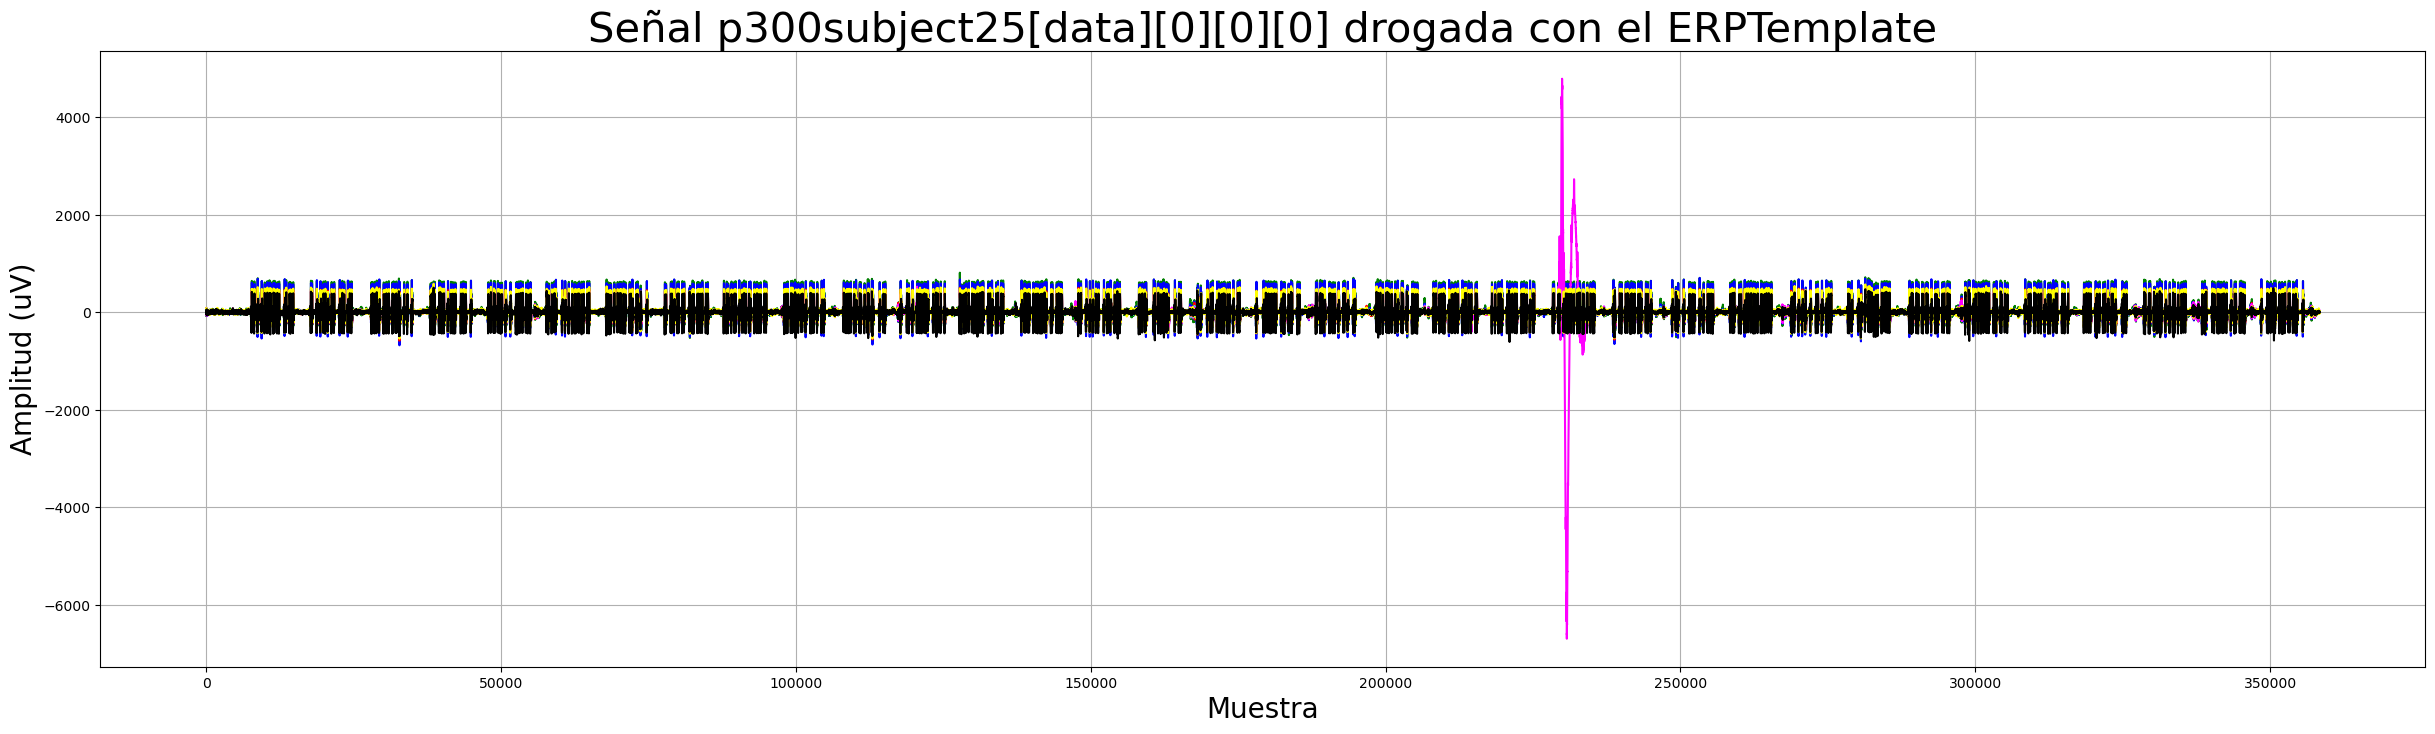

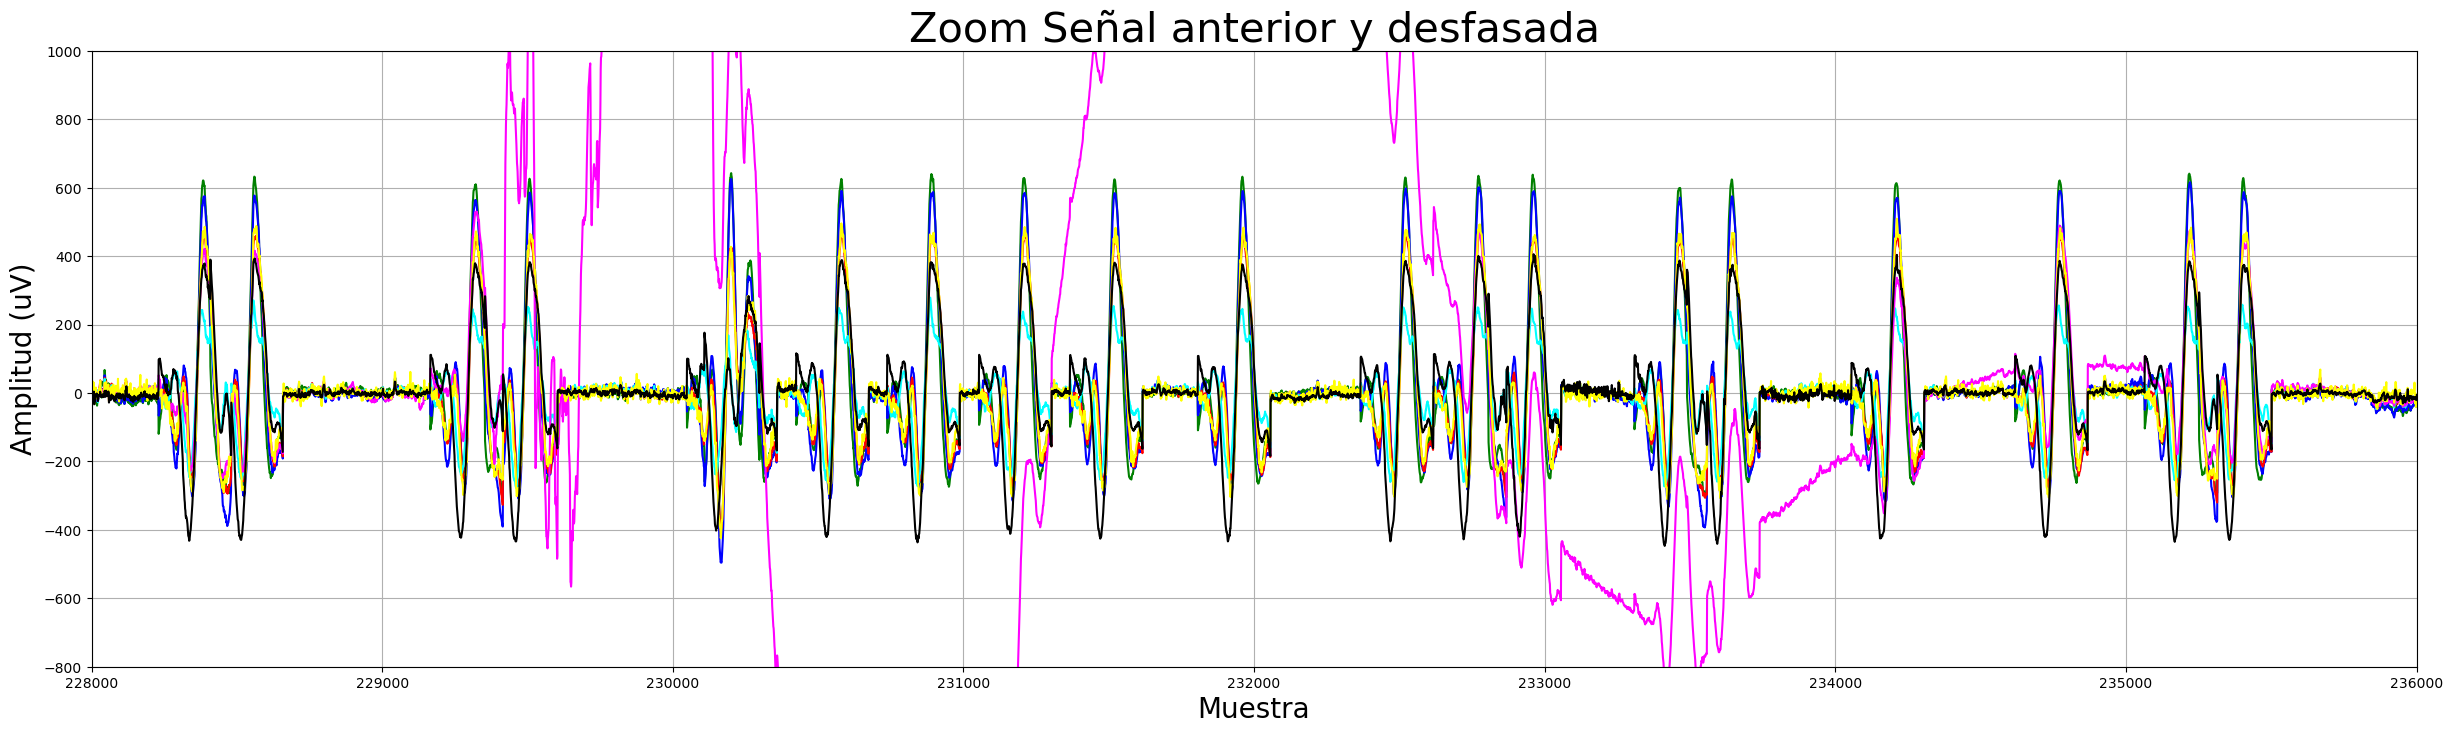

(None, None)

In [4]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])              
axes.set_title('Señal p300subject25[data][0][0][0] drogada con el ERPTemplate'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/01DrguSignal2.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([228000,236000]), plt.ylim([-800,1000])
plt.savefig("./a_images/02Zoom_DrguSignal2.jpg")
plt.grid(), plt.show()